In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels
from statsmodels import api as sm
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge

## Q1

In [2]:
data = pd.read_csv('Data/Q1/communities.csv')
print(data.head())
print(data.shape)
print(data.size)

    state   county   community   communityname string   fold    population   \
0        8        ?           ?          Lakewoodcity       1          0.19   
1       53        ?           ?           Tukwilacity       1          0.00   
2       24        ?           ?          Aberdeentown       1          0.00   
3       34        5       81440   Willingborotownship       1          0.04   
4       42       95        6096     Bethlehemtownship       1          0.01   

    householdsize    racepctblack    racePctWhite    racePctAsian   ...  \
0             0.33            0.02            0.90            0.12  ...   
1             0.16            0.12            0.74            0.45  ...   
2             0.42            0.49            0.56            0.17  ...   
3             0.77            1.00            0.08            0.12  ...   
4             0.55            0.02            0.95            0.09  ...   

    LandArea    PopDens    PctUsePubTrans    PolicCars    PolicOperBudg   

Text(0.5, 1.0, 'Total Violent Crimes')

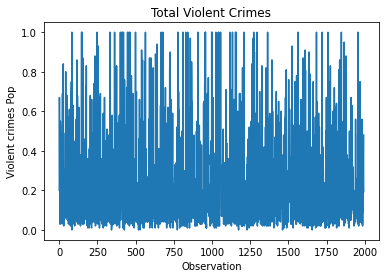

In [3]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(data[' ViolentCrimesPerPop '])
ax.set_xlabel('Observation')
ax.set_ylabel('Violent crimes Pop')
ax.set_title('Total Violent Crimes')


In [4]:
## For your analysis, you should disregard the first five columns (state, county, community,
## communityname string and fold
## Data Cleaning
print('Before Cleaing first 5 colums')
#print(data.columns.values)
print(data.shape)
data = data.drop([' state ', ' county ', ' community ', ' communityname string', ' fold '], axis=1)
print('After Cleaning first 5 colums')
#print(data)
#print(data.columns.values)
print(data.shape)


Before Cleaing first 5 colums
(1994, 128)
After Cleaning first 5 colums
(1994, 123)


In [5]:
## Searches for all ? and replaces it with nan
threshold = 300
data = data.replace('?', np.nan)
columns_to_remove = []
for column in data.columns.values:
    if np.sum(data[column].isna()) > threshold:
        # add this column to the list that should be removed
        columns_to_remove.append(column)

print('To Remove')
print(columns_to_remove)
print(len(columns_to_remove))    
# now lets remove them
data = data.drop(columns_to_remove, axis=1)
print(data.shape)


To Remove
[' LemasSwornFT ', ' LemasSwFTPerPop ', ' LemasSwFTFieldOps ', ' LemasSwFTFieldPerPop ', ' LemasTotalReq ', ' LemasTotReqPerPop ', ' PolicReqPerOffic ', ' PolicPerPop ', ' RacialMatchCommPol ', ' PctPolicWhite ', ' PctPolicBlack ', ' PctPolicHisp ', ' PctPolicAsian ', ' PctPolicMinor ', ' OfficAssgnDrugUnits ', ' NumKindsDrugsSeiz ', ' PolicAveOTWorked ', ' PolicCars ', ' PolicOperBudg ', ' LemasPctPolicOnPatr ', ' LemasGangUnitDeploy ', ' PolicBudgPerPop ']
22
(1994, 101)


In [6]:
print(np.sum(data.isna(), axis=1))
print(np.sum(np.sum(data.isna(), axis=1) > 0))
nans = data.isna()
print(type(nans))
nans.to_csv('nans.csv')
data_filtered = data.dropna(axis=0)
data_filtered.head()
print('Final dataset shape = {}'.format(data_filtered.shape))
print(data.iloc[11, :])
data.to_csv('question1.csv')

0       0
1       0
2       0
3       0
4       0
       ..
1989    0
1990    0
1991    0
1992    0
1993    0
Length: 1994, dtype: int64
1
<class 'pandas.core.frame.DataFrame'>
Final dataset shape = (1993, 101)
 population              0.02
 householdsize           0.46
 racepctblack            0.08
 racePctWhite            0.91
 racePctAsian            0.07
                         ... 
 LandArea                0.01
 PopDens                 0.63
 PctUsePubTrans           1.0
 LemasPctOfficDrugUn      0.0
 ViolentCrimesPerPop     0.08
Name: 11, Length: 101, dtype: object


In [7]:
#Splitting for test &A validation data
training_data, testing_data = train_test_split(data_filtered, test_size=0.3, random_state=1)
testing_data, validating_data = train_test_split(testing_data, test_size=0.4, random_state=1)

x_var = [x for x in data.columns.values]
x_var.remove(' ViolentCrimesPerPop ')
y_var = ' ViolentCrimesPerPop '


In [8]:
y_train = np.array(training_data[y_var], dtype=np.float64)
x_train = np.array(training_data[x_var], dtype=np.float64)
x_train = sm.add_constant(x_train)


In [9]:
y_test = np.array(testing_data[y_var], dtype=np.float64)
x_test = np.array(testing_data[x_var], dtype=np.float64)
x_test = sm.add_constant(x_test)


In [10]:
y_val = np.array(validating_data[y_var], dtype=np.float64)
x_val = np.array(validating_data[x_var], dtype=np.float64)
x_val = sm.add_constant(x_val)


In [11]:
print(data_filtered.isnull().sum())
model = sm.OLS(y_train, x_train)
model_fit = model.fit()


 population              0
 householdsize           0
 racepctblack            0
 racePctWhite            0
 racePctAsian            0
                        ..
 LandArea                0
 PopDens                 0
 PctUsePubTrans          0
 LemasPctOfficDrugUn     0
 ViolentCrimesPerPop     0
Length: 101, dtype: int64


Linear Model Testing Data: RMSE = 0.15319677394567066
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     33.33
Date:                Wed, 14 Apr 2021   Prob (F-statistic):          5.57e-290
Time:                        18:08:45   Log-Likelihood:                 913.28
No. Observations:                1395   AIC:                            -1625.
Df Residuals:                    1294   BIC:                            -1095.
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

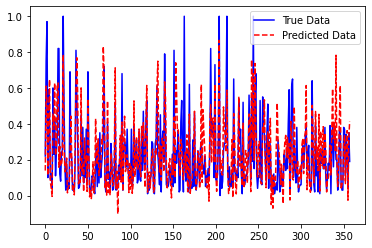

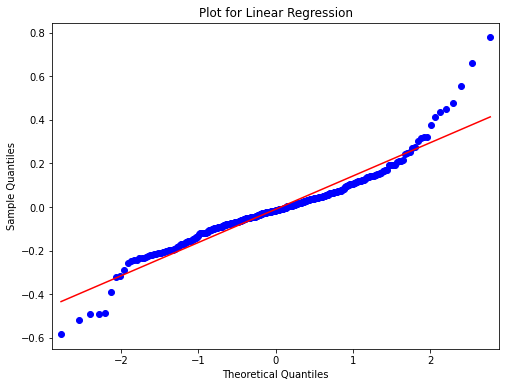

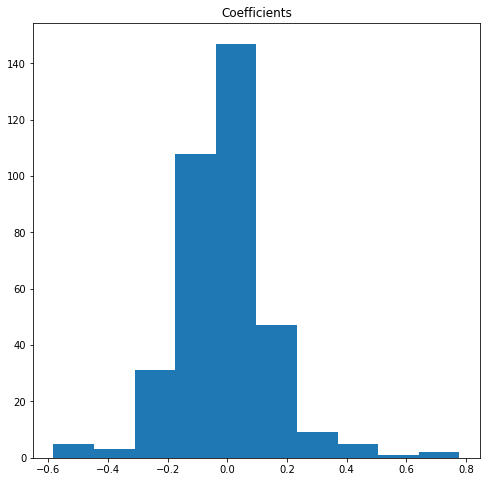

In [12]:
model_fit = model.fit()
test_eval = model_fit.predict(x_test)
print('Linear Model Testing Data: RMSE = {}'.format(
    np.sqrt(mean_squared_error(y_test, test_eval))))
print(model_fit.summary())
plt.figure()
plt.plot(y_test, 'b', label='True Data')
plt.plot(test_eval, 'r--', label='Predicted Data')
plt.legend()
resid = y_test - test_eval
fig, ax = plt.subplots(figsize=(8,6))
sm.qqplot(resid, ax=ax, line='s')
plt.title('Plot for Linear Regression')
fig = plt.figure(figsize=[8,8])
ax = fig.add_subplot(1,1,1)
ax.hist(resid)
ax.set_title('Coefficients')
plt.show()


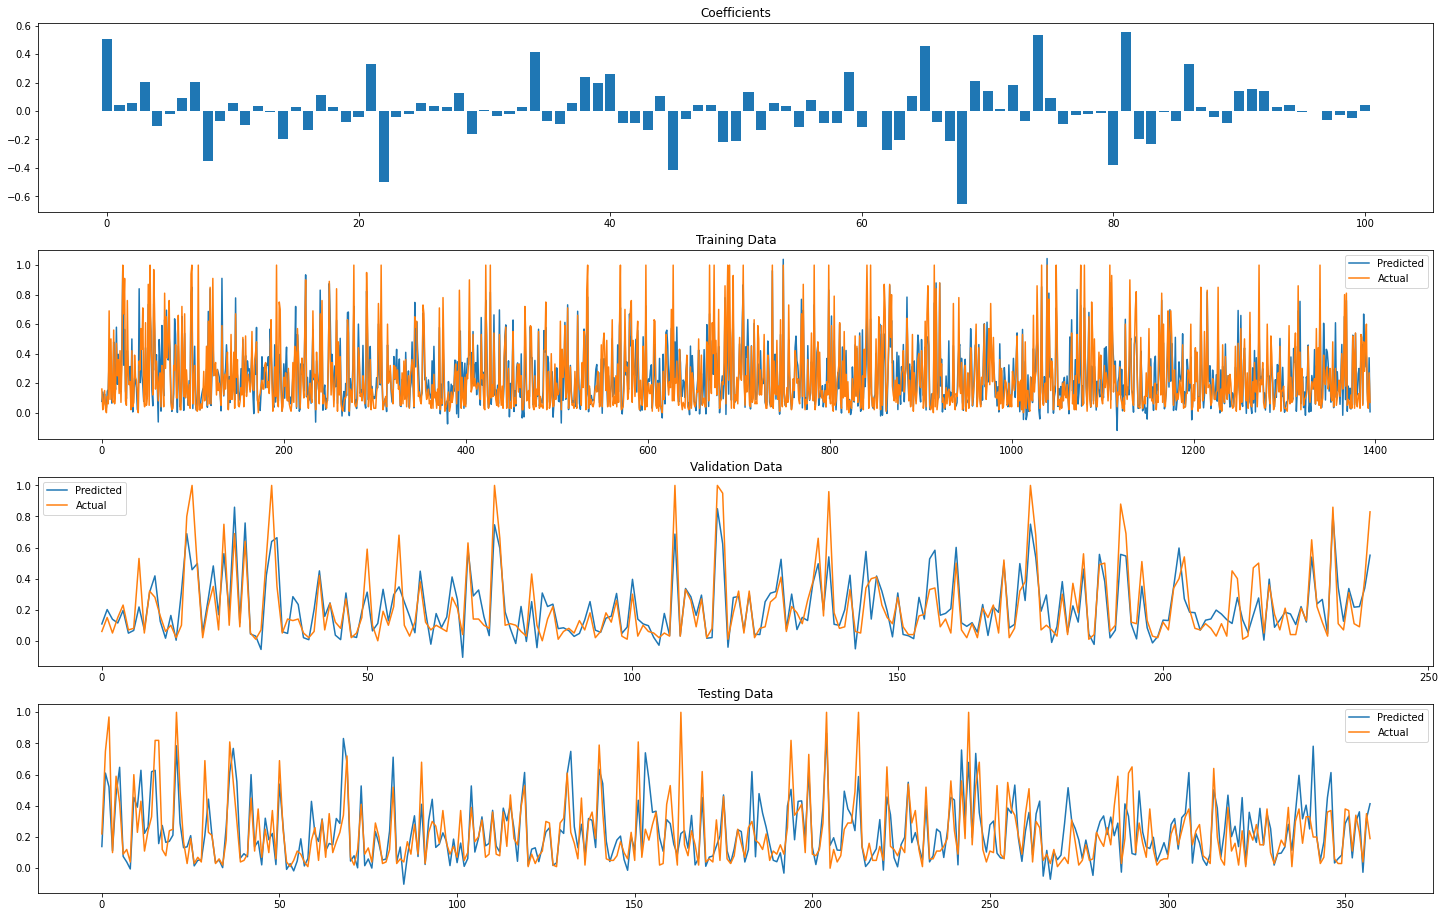

In [13]:
linear = LinearRegression(fit_intercept = False).fit(x_train, y_train)
fig = plt.figure(figsize=[25, 16])
ax = fig.add_subplot(4, 1, 1)
ax.bar(range(len(linear.coef_)), linear.coef_)
ax.set_title('Coefficients')
ax = fig.add_subplot(4, 1, 2)
ax.plot(linear.predict(x_train), label='Predicted')
ax.plot(y_train, label='Actual')
ax.set_title('Training Data')
ax.legend()
ax = fig.add_subplot(4, 1, 3)
ax.plot(linear.predict(x_val), label='Predicted')
ax.plot(y_val, label='Actual')
ax.set_title('Validation Data')
ax.legend()
ax = fig.add_subplot(4, 1, 4)
ax.plot(linear.predict(x_test), label='Predicted')
ax.plot(y_test, label='Actual')
ax.set_title('Testing Data')
ax.legend();


In [14]:
alpha = 1.001
model_L1_fit = model.fit_regularized(alpha=alpha, L1_wt=1)
pred = model_L1_fit.predict(x_val)
print('L1: alpha = {}, RMSE = {}'.format(
    alpha, np.sqrt(mean_squared_error(y_val, model_L1_fit.predict(x_val)))
))

model_L2_fit = model.fit_regularized(aplha=alpha, L1_wt=0)
pred = model_L2_fit.predict(x_val)
print('L2: alpha = {},  RMSE = {}'.format(
    alpha, np.sqrt(mean_squared_error(y_val, model_L2_fit.predict(x_val)))))

best_rmse = 10e12
best_alpha = []
best_L1_L2 = []

best_rmse_ridge = 10e12
best_alpha_ridge = []

init_alpha_list = [0.00001, 0.0001, 0.001, 0.01, 0.1]
alpha_list_from_one  = np.linspace(1, 1000, 500)
alpha_list  = []
for alpha in init_alpha_list:
    alpha_list.append(alpha)
for alpha in alpha_list_from_one:
    alpha_list.append(alpha)

for alpha in alpha_list:
    model_cross_fit = model.fit_regularized(alpha=alpha, L1_wt=1)
    pred = model_cross_fit.predict(x_val)
    rmse = np.sqrt(mean_squared_error(y_val, model_cross_fit.predict(x_val)))
    print('Lasso,  alpha = {},  RMSE = {}'.format(alpha, rmse))
    if rmse < best_rmse:
        best_rmse = rmse
        best_alpha = alpha

print("\n")

for alpha_ridge in alpha_list:
    model_cross_fit_ridge = model.fit_regularized(alpha=alpha_ridge, L1_wt=0)
    pred_ridge = model_cross_fit_ridge.predict(x_val)
    rmse_ridge = np.sqrt(mean_squared_error(y_val, model_cross_fit_ridge.predict(x_val)))
    print('Ridge,  alpha = {},  RMSE = {}'.format(alpha_ridge, rmse_ridge))
    if rmse_ridge < best_rmse_ridge:
        best_rmse_ridge = rmse_ridge
        best_alpha_ridge = alpha_ridge

print('\nBest Model Lasso: alpha = {}, RMSE = {}'.format(best_alpha, best_rmse))
print('\nBest Model Ridge: alpha = {}, RMSE = {}'.format(best_alpha_ridge, best_rmse_ridge))



pha = 363.36272545090185,  RMSE = 0.31684793296684094
Ridge,  alpha = 365.36472945891785,  RMSE = 0.31688653417070234
Ridge,  alpha = 367.3667334669339,  RMSE = 0.3169247385492068
Ridge,  alpha = 369.3687374749499,  RMSE = 0.3169625521880255
Ridge,  alpha = 371.37074148296597,  RMSE = 0.3169999810490687
Ridge,  alpha = 373.37274549098197,  RMSE = 0.3170370309736143
Ridge,  alpha = 375.374749498998,  RMSE = 0.3170737076853427
Ridge,  alpha = 377.37675350701403,  RMSE = 0.31711001679328027
Ridge,  alpha = 379.3787575150301,  RMSE = 0.31714596379465465
Ridge,  alpha = 381.3807615230461,  RMSE = 0.3171815540776658
Ridge,  alpha = 383.38276553106215,  RMSE = 0.31721679292417443
Ridge,  alpha = 385.3847695390782,  RMSE = 0.3172516855123114
Ridge,  alpha = 387.3867735470942,  RMSE = 0.3172862369190114
Ridge,  alpha = 389.38877755511027,  RMSE = 0.3173204521224715
Ridge,  alpha = 391.39078156312627,  RMSE = 0.31735433600453955
Ridge,  alpha = 393.3927855711423,  RMSE = 0.3173878933530329
Ridge

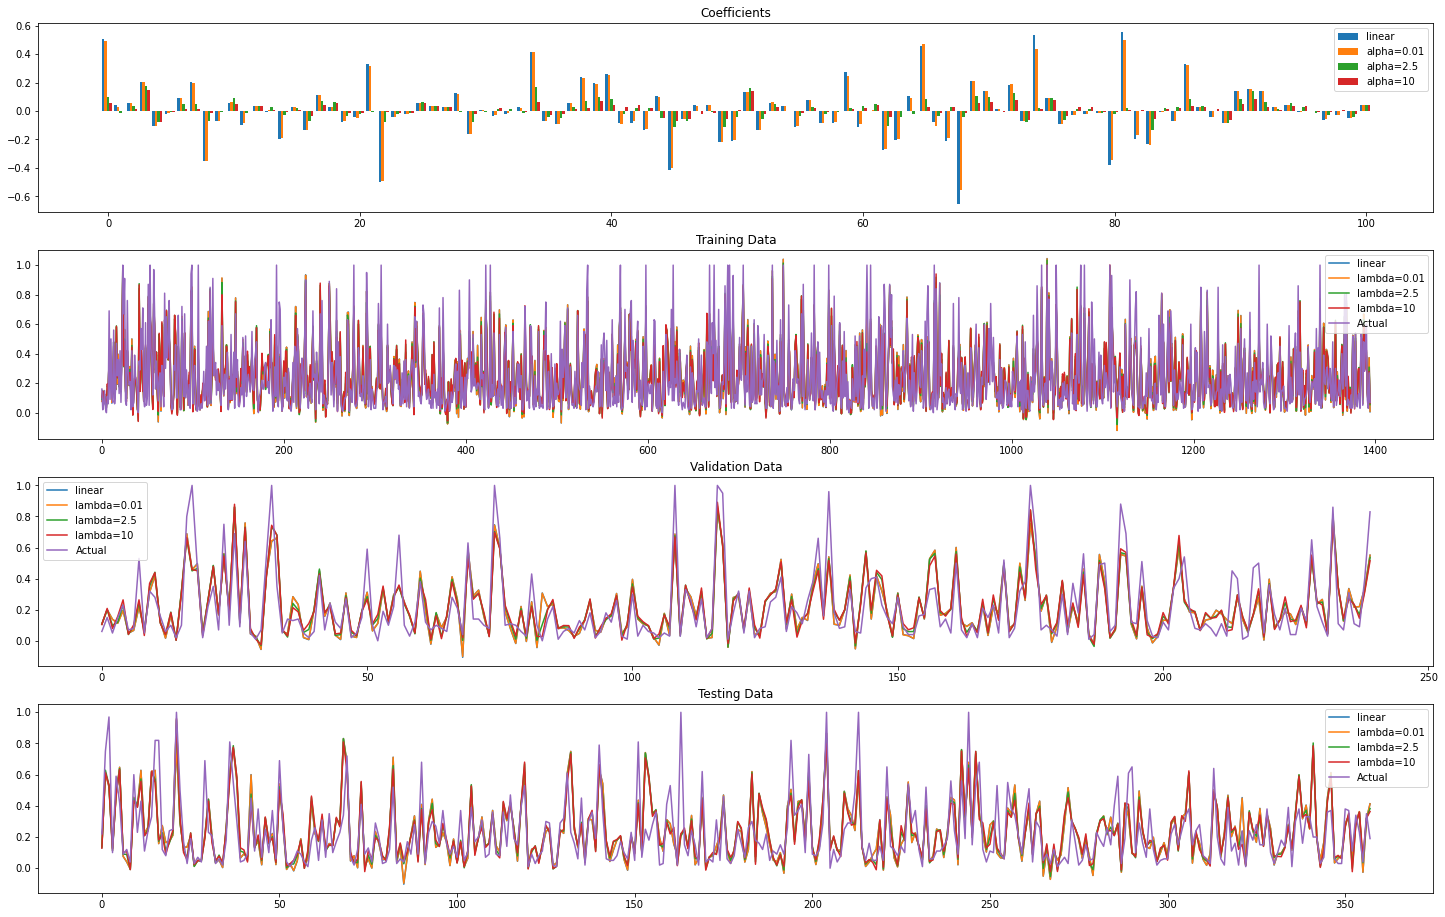

In [15]:
glenn_1 = Ridge(fit_intercept=False, alpha=0.01).fit(X = x_train, y = y_train)
glenn_2 = Ridge(fit_intercept=False, alpha=2.5).fit(X = x_train, y = y_train)
glenn_3 = Ridge(fit_intercept=False, alpha=10).fit(X = x_train, y = y_train)

fig = plt.figure(figsize=[25, 16])
ax = fig.add_subplot(4, 1, 1)
w = 0.2
pos = np.arange(0, len(linear.coef_), 1)
ax.bar(pos - w*2, linear.coef_, width=w, label='linear')
ax.bar(pos - w, glenn_1.coef_, width=w, label='alpha=0.01')
ax.bar(pos, glenn_2.coef_, width=w, label='alpha=2.5')
ax.bar(pos + w, glenn_3.coef_, width=w, label='alpha=10')
ax.legend()
ax.set_title('Coefficients')
ax = fig.add_subplot(4, 1, 2)
ax.plot(linear.predict(x_train), label='linear')
ax.plot(glenn_1.predict(x_train), label='lambda=0.01')
ax.plot(glenn_2.predict(x_train), label='lambda=2.5')
ax.plot(glenn_3.predict(x_train), label='lambda=10')
ax.plot(y_train, label='Actual')
ax.set_title('Training Data')
ax.legend()
ax = fig.add_subplot(4, 1, 3)
ax.plot(linear.predict(x_val), label='linear')
ax.plot(glenn_1.predict(x_val), label='lambda=0.01')
ax.plot(glenn_2.predict(x_val), label='lambda=2.5')
ax.plot(glenn_3.predict(x_val), label='lambda=10')
ax.plot(y_val, label='Actual')
ax.set_title('Validation Data')
ax.legend()
ax = fig.add_subplot(4, 1, 4)
ax.plot(linear.predict(x_test), label='linear')
ax.plot(glenn_1.predict(x_test), label='lambda=0.01')
ax.plot(glenn_2.predict(x_test), label='lambda=2.5')
ax.plot(glenn_3.predict(x_test), label='lambda=10')
ax.plot(y_test, label='Actual')
ax.set_title('Testing Data')
ax.legend();



L1 Lasso Model: alpha = 0.001, RMSE = 0.1509638047143373
C:\Users\nicho\AppData\Roaming\Python\Python39\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


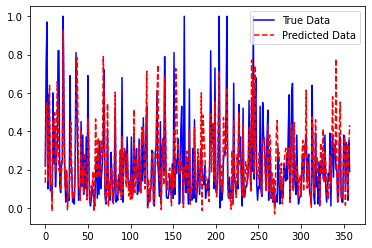

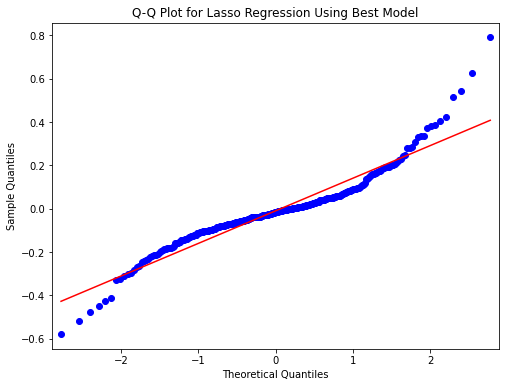

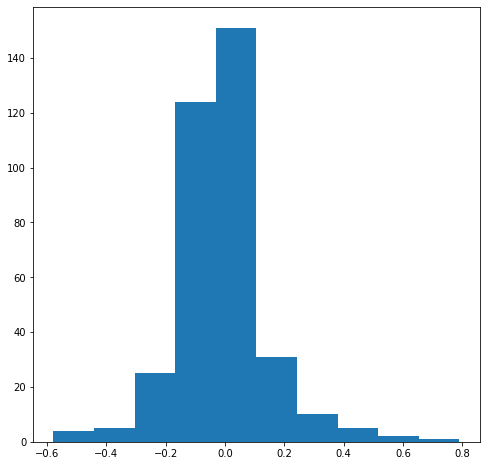

In [16]:
model_best = model.fit_regularized(alpha=0.001, L1_wt=1)
test_eval = model_best.predict(x_test)
print('L1 Lasso Model: alpha = 0.001, RMSE = {}'.format(
    np.sqrt(mean_squared_error(y_test, model_best.predict(x_test))))
)
plt.figure()
plt.plot(y_test, 'b', label='True Data')
plt.plot(test_eval, 'r--', label='Predicted Data')
plt.legend()

resid = y_test - test_eval

fig, ax=plt.subplots(figsize=(8,6))
sm.qqplot(resid, ax=ax, line='s')
plt.title('Q-Q Plot for Lasso Regression Using Best Model')
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(1, 1, 1)
ax.hist(resid)
plt.show()



L2 Ridge model: alpha = 0.001. RMSE = 0.12588084589442944
C:\Users\nicho\AppData\Roaming\Python\Python39\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


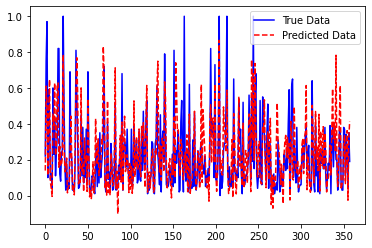

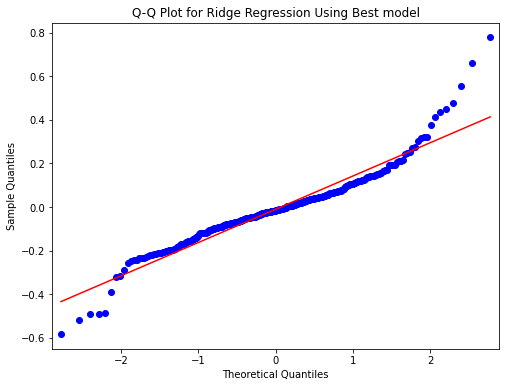

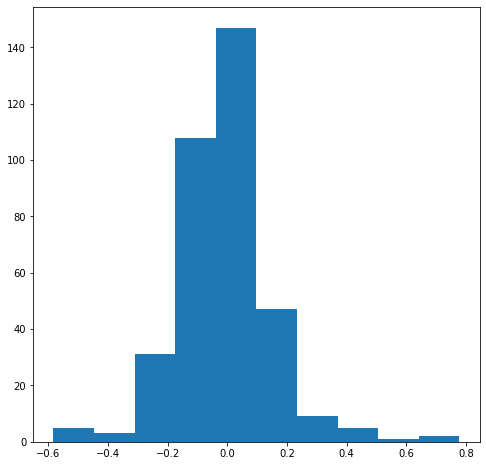

In [17]:
model_best = model.fit_regularized(aplha=0.001, L1_wt=0)
test_eval = model_best.predict(x_test)
print('L2 Ridge model: alpha = 0.001. RMSE = {}'.format(
    np.sqrt(mean_squared_error(y_val, model_best.predict(x_val)))))
plt.figure()
plt.plot(y_test, 'b', label='True Data')
plt.plot(test_eval, 'r--', label='Predicted Data')
plt.legend()
resid = y_test - test_eval
fig, ax = plt.subplots(figsize=(8,6))
sm.qqplot(resid, ax=ax, line='s')
plt.title('Q-Q Plot for Ridge Regression Using Best model')
fig = plt.figure(figsize=[8,8])
ax = fig.add_subplot(1,1,1)
ax.hist(resid)
plt.show()
